# Clases 5 y 6: Técnicas para la exploración de los datos

**Parte 1: Filtrado de datos**

Resumen de métodos avanzados de filtrado y manipulación de datos en Pandas, incluyendo LOC, ILOC, Where, Query, y funciones como Pivot, Apply, Merge y Concat.

Parte 2: Limpieza de texto

Síntesis de los pasos clave en la limpieza y preparación de texto para análisis, como normalización, eliminación de ruido, lematización y stemming

Parte 3: Selección de características

Introducción concisa al proceso de identificar y elegir características relevantes para optimizar modelos predictivos.

## Introducción

La exploración de datos es un paso fundamental en el análisis de datos y la construcción de modelos predictivos. En estas clases, aprenderemos técnicas avanzadas para seleccionar, descubrir y diseñar características relevantes que ayuden a resolver problemas específicos.

## Filtrado de datos

### Filtrado con LOC e ILOC
LOC e ILOC son métodos de Pandas para seleccionar datos de un DataFrame basado en etiquetas o posiciones.
Con el método LOC se tiene la posibilidad de acceder a una fila mediante el nombre del indice, sin embargo con ILOC accedemos por la posiscion implicita del dataframe.

### Filtrado con Where y Query
Where y Query permiten realizar filtrados más complejos basados en condiciones.+
Utilizamos query cuando queremos filtrar como lo haríamos en SQL, se hacen consultas sobre las columnas del dataframe en forma de texto.
En el caso de where las consultas tienen un formato distinto, la consulta se pasa en forma de expresion booleana y si esa condicion se cumple reemplaza el valor por el entregado.
Es decir la diferencia es que uno permite reemplazar aquellos valores que cumplen la condición  (where) mientras que el otro metodo solo nos sirve para filtrar los datos (query).

## Transformaciones y manipulación de datos

### Pivot, Apply, Merge y Concat
Estas funciones permiten transformar, combinar y extender DataFrames para obtener la estructura deseada.

## Selección de características
La selección de características es el proceso de identificar y seleccionar un subconjunto de características relevantes para construir un modelo predictivo eficaz. Este proceso ayuda a mejorar la precisión del modelo y a reducir el tiempo de entrenamiento al enfocarse solo en las características más importantes.

### Correlación entre variables
La correlación entre variables es una técnica utilizada para determinar la relación lineal entre dos o más variables. La fuerza y la dirección de esta relación se representan mediante el coeficiente de correlación “r”, el cual oscila entre -1 y 1. Un valor de r cercano a 1 indica una fuerte correlación positiva, mientras que un valor cercano a -1 indica una fuerte correlación negativa. Un valor cercano a 0 indica que no hay una relación lineal significativa entre las variables.


## Práctica


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargar el conjunto de datos de ejemplo
df = sns.load_dataset("titanic")
print("DataFrame de ejemplo:")
print(df.head())

DataFrame de ejemplo:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Filtrado de datos con LOC e ILOC

Vamos a seleccionar datos utilizando los métodos LOC e ILOC.
LOC e ILOC son métodos de Pandas para seleccionar datos de un DataFrame. LOC utiliza etiquetas de filas y columnas, mientras que ILOC utiliza índices numéricos.

In [ ]:
# Filtrado con loc
# Seleccionar todas las filas donde 'age' es mayor a 30 y mostrar las columnas 'survived' y 'age'
df_loc = df.loc[df['age'] > 30, ['survived', 'age']]
print("Filtrado con loc:")
print(df_loc.head())

# Filtrado con iloc
# Seleccionar las primeras 10 filas y las columnas en las posiciones 0 y 1
df_iloc = df.iloc[:10, [0, 1]]
print("\nFiltrado con iloc:")
print(df_iloc)

Filtrado con loc:
    survived   age
1          1  38.0
3          1  35.0
4          0  35.0
6          0  54.0
11         1  58.0

Filtrado con iloc:
   survived  pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3
5         0       3
6         0       1
7         0       3
8         1       3
9         1       2


### Filtrado de Datos con Where y Query

Vamos a utilizar las funciones Where y Query para filtrar datos.


In [ ]:
# Filtrado con where
import numpy as np
# Seleccionar todas las filas donde 'fare' es mayor a 50
df_where = df.where(df['fare'] > 50).dropna()
print("\nFiltrado con where:")
print(df_where.head())

# Filtrado con query
# Seleccionar todas las filas donde 'sex' es 'male' y 'age' es menor a 18
df_query = df.query("sex == 'male' and age < 18")
print("\nFiltrado con query:")
print(df_query.head())


Filtrado con where:
    survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1        1.0     1.0  female  38.0    1.0    0.0   71.2833        C  First   
3        1.0     1.0  female  35.0    1.0    0.0   53.1000        S  First   
6        0.0     1.0    male  54.0    0.0    0.0   51.8625        S  First   
27       0.0     1.0    male  19.0    3.0    2.0  263.0000        S  First   
52       1.0     1.0  female  49.0    1.0    0.0   76.7292        C  First   

      who adult_male deck  embark_town alive  alone  
1   woman      False    C    Cherbourg   yes  False  
3   woman      False    C  Southampton   yes  False  
6     man       True    E  Southampton    no   True  
27    man       True    C  Southampton    no  False  
52  woman      False    D    Cherbourg   yes  False  

Filtrado con query:
    survived  pclass   sex   age  sibsp  parch     fare embarked  class  \
7          0       3  male   2.0      3      1  21.0750        S  Third   
16         0   

## Pandas sql
Es una biblioteca que permite ejecutar consultas SQL sobre un DataFrame de pandas

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=933a347a361200933e2689743e00aeb421baa72a9d46b7c24fb98bc0387b2ab2
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
# Importar pandas y pandasql
import pandas as pd
import pandasql as ps
import seaborn as sns

# Cargar el dataset de Titanic desde seaborn
df = sns.load_dataset("titanic")

# Consulta SQL simple directamente sobre el DataFrame
query = "SELECT survived, sex, age FROM df WHERE age > 30"

# Ejecutar la consulta SQL sin usar 'locals'
df_query = ps.sqldf(query)

# Mostrar las primeras filas del resultado
print(df_query.head())

### TODO: Filtrar los pasajeros sobrevivientes (survived = 1)
### TODO: Calcular la edad promedio de los sobrevivientes
### TODO: Contar cuántos pasajeros menores de 18 años hay en total


   survived     sex   age
0         1  female  38.0
1         1  female  35.0
2         0    male  35.0
3         0    male  54.0
4         1  female  58.0


### Transformaciones y manipulación de datos

Vamos a utilizar las funciones Pivot, Apply, Merge y Concat para transformar y combinar DataFrames.


In [ ]:
# Pivot
# Crear una tabla dinámica que muestre el promedio de 'fare' para cada combinación de 'sex' y 'class'
pivot_df = df.pivot_table(values='fare', index='sex', columns='class', aggfunc='mean')
print("\nTabla dinámica (pivot):")
print(pivot_df)

# Apply
# Aplicar una función que convierta la columna 'age' a una categoría de edad
def age_category(age):
    if age < 18:
        return 'Menor'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Anciano'

df['age_category'] = df['age'].apply(age_category)
print("\nDataFrame después de aplicar función a 'age':")
print(df[['age', 'age_category']].head())

# Merge
# Crear un segundo DataFrame para realizar una fusión
df2 = df[['survived', 'sex', 'age']].sample(10, random_state=1)
df_merged = pd.merge(df, df2, on='survived', suffixes=('', '_duplicate'))
print("\nDataFrame después de la fusión (merge):")
print(df_merged.head())

# Concat
# Concatenar dos DataFrames verticalmente
df_concat = pd.concat([df.head(), df.tail()])
print("\nDataFrame después de la concatenación (concat):")
print(df_concat)


Tabla dinámica (pivot):
class        First     Second      Third
sex                                     
female  106.125798  21.970121  16.118810
male     67.226127  19.741782  12.661633

DataFrame después de aplicar función a 'age':
    age age_category
0  22.0       Adulto
1  38.0       Adulto
2  26.0       Adulto
3  35.0       Adulto
4  35.0       Adulto

DataFrame después de la fusión (merge):
   survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   
1         0       3  male  22.0      1      0  7.25        S  Third  man   
2         0       3  male  22.0      1      0  7.25        S  Third  man   
3         0       3  male  22.0      1      0  7.25        S  Third  man   
4         0       3  male  22.0      1      0  7.25        S  Third  man   

   adult_male deck  embark_town alive  alone age_category sex_duplicate  \
0        True  NaN  Southampton    no  False       Adulto        

### Selección de características

Vamos a seleccionar características relevantes utilizando técnicas básicas y avanzadas empezamos con funciones de Correlación entre Variables



Características relevantes (correlación):
survived       1.000000
pclass         0.338481
fare           0.257307
adult_male     0.557080
alone          0.203367
sex_male       0.543351
class_Third    0.322308
who_man        0.557080
who_woman      0.506562
alive_yes      1.000000
Name: survived, dtype: float64


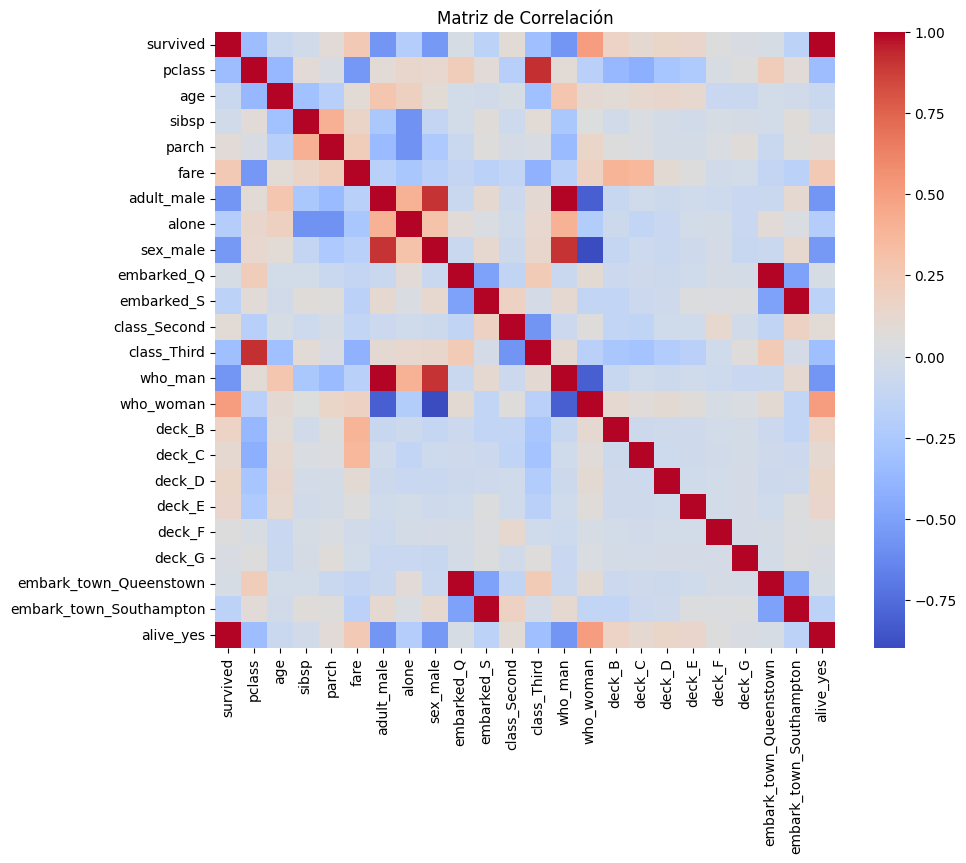

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de ejemplo
df = sns.load_dataset("titanic")

# Convertir las variables categóricas a variables dummy
df_numeric = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Seleccionar características que tengan alta correlación con la variable objetivo 'survived'
correlation_target = abs(correlation_matrix["survived"])
relevant_features = correlation_target[correlation_target > 0.2]
print("\nCaracterísticas relevantes (correlación):")
print(relevant_features)

# grafica correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Ejercicios

En esta sección, aplicarás lo aprendido sobre técnicas para la exploración de datos. Completa los siguientes ejercicios:

## Ejercicio 1: Filtrado de datos

1. Carga el conjunto de datos `tips` de Seaborn.
2. Utiliza LOC para seleccionar todas las filas donde el `total_bill` es mayor a 20 y mostrar las columnas `total_bill` y `tip`.
3. Utiliza ILOC para seleccionar las primeras 15 filas y las columnas en las posiciones 0 y 1.


In [ ]:
# Ejercicio 1: Filtrado de Datos

##TODO  Cargar el conjunto de datos `tips`
tips = ?
print("\nDataFrame de tips:")

##TODO 2. Utilizar LOC para seleccionar todas las filas donde 'total_bill' es mayor a 20
df_loc_tips = ?
print("\nFiltrado con loc (tips):")

##TODO 3. Utilizar ILOC para seleccionar las primeras 15 filas y las columnas en las posiciones 0 y 1
df_iloc_tips = ?
print("\nFiltrado con iloc (tips):")


## Ejercicio 2: Filtrado de datos con Where y Query

1. Utiliza Where para seleccionar todas las filas donde `time` es 'Dinner'.
2. Utiliza Query para seleccionar todas las filas donde `sex` es 'Female' y `day` es 'Sun'.



In [ ]:
# Ejercicio 2: Filtrado de Datos con Where y Query

##TODO 1. Utilizar Where para seleccionar todas las filas donde 'time' es 'Dinner'
df_where_tips = ?
print("\nFiltrado con where (tips):")

##TODO 2. Utilizar Query para seleccionar todas las filas donde 'sex' es 'Female' y 'day' es 'Sun'
df_query_tips = ?
print("\nFiltrado con query (tips):")


## Ejercicio 3: Transformaciones y Manipulación de Datos

1. Crea una tabla dinámica que muestre el promedio de `tip` para cada combinación de `sex` y `smoker`.
2. Aplica una función que clasifique la columna `total_bill` en 'Bajo', 'Medio' y 'Alto'.
3. Realiza una fusión de dos DataFrames.
4. Concatenar dos DataFrames verticalmente.



In [ ]:
# Ejercicio 3: Transformaciones y Manipulación de Datos

##TODO 1. Crear una tabla dinámica que muestre el promedio de 'tip' para cada combinación de 'sex' y 'smoker'
pivot_tips = ???
print("\nTabla dinámica (tips):")
print(pivot_tips)

##TODO 2. Aplicar una función que clasifique la columna 'total_bill' en 'Bajo', 'Medio' y 'Alto'
tips['bill_category'] = tips['total_bill'].apply(???)
print("\nDataFrame después de aplicar función a 'total_bill':")
print(tips[['total_bill', 'bill_category']].head())

##TODO 3. Fusiona el DataFrame tips con otra DataFrame resultado de muestra seleccionada, usando la columna total_bill como clave para la unión.
???
print("\nDataFrame después de la fusión (merge):")
print(tips_merged.head())

##TODO 4. Concatenar dos DataFrames verticalmente
???
print("\nDataFrame después de la concatenación (concat):")
print(tips_concat)


## Ejercicio 4: Selección de Características

1. Selecciona las características que tienen alta correlación con la variable objetivo `tip`.

In [ ]:
# Ejercicio 4: Selección de Características
import pandas as pd
import seaborn as sns

##TODO 1. Convertir las variables categóricas a variables dummy
tips_numeric = ???

##TODO 2. Calcular la matriz de correlación
correlation_matrix_tips = ???

##TODO 3. Seleccionar características que tienen alta correlación (> 0.1) con la variable objetivo 'tip'
correlation_target_tips = ???
relevant_features_tips = ???
print("\nCaracterísticas relevantes (correlación) (tips):")
print(relevant_features_tips)

##TODO 4. TODO graficar un mapa de calor usando la correlation_matrix_tips


## Tarea

Para la próxima clase, realiza las siguientes actividades sobre el dataset planets:

1. Busca un conjunto de datos que contenga múltiples características.
2. Realiza las siguientes operaciones:
   - Filtrado de datos utilizando LOC e ILOC.
   - Filtrado de datos utilizando Where y Query.
   - Transformaciones y manipulaciones de datos utilizando Pivot, Apply, Merge y Concat.
   - Selección de características relevantes utilizando correlación.
   - Selección automática de características utilizando featurewiz.

Documenta tu análisis y sube el cuaderno completo en formato Jupyter Notebook a la plataforma de la diplomatura antes de la próxima clase.

¡Buena suerte y no dudes en consultar si tienes alguna duda!
